# 4. Evaluating a model using the `scoring` parameter.

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Import the Random Forest Classifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Intantiate and fit the model (on the training set)
clf = RandomForestClassifier(n_estimators=50) 
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8852459016393442

In [3]:
# For scoring we can use cross validation 
np.random.seed(42)
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv = 5)

array([0.83606557, 0.86885246, 0.81967213, 0.8       , 0.76666667])

In [4]:
np.mean(cross_val_score(clf, X, y, cv = 5))

0.8182513661202184

# 4.1 Classification model evaluation metrics
1. Area under ROC curve
2. CConfusion matrix
3. Classification report

**4.1.1.Area under the receiver operating characteristics curve (AUC/ROC)**

* Area Under Curve (AUC).
* Receiver Operating Characteristics curve (ROC).

ROC curves are a comparison of a model's true positive rate (tpr) vs a model's false positive rate (fpr).

* True Positive = model predicts 1 when the truth is 1.
* Flase positve = Model predicts 1 when the truth is 0.
* True negetive = Model predicts 0 when the truth is 0.
* False negetive = Model predicts 0 when the truth is 1.

In [5]:
# we can see the probability of prediction of our model.
y_probs = clf.predict_proba(X_test)
y_probs[:5]

array([[0.9 , 0.1 ],
       [0.5 , 0.5 ],
       [0.44, 0.56],
       [0.8 , 0.2 ],
       [0.16, 0.84]])

In [6]:
# If we only takes the positive value 
y_probs_positve = y_probs[:,1]
y_probs_positve[:5]

array([0.1 , 0.5 , 0.56, 0.2 , 0.84])

In [7]:
# Claculate the fpr, tpr and threshold
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positve)

# Check the fpr
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.06896552, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.37931034, 0.51724138,
       0.65517241, 0.79310345, 0.89655172, 0.96551724, 1.        ])

In [8]:
tpr

array([0.     , 0.0625 , 0.15625, 0.28125, 0.40625, 0.4375 , 0.5    ,
       0.59375, 0.625  , 0.75   , 0.78125, 0.78125, 0.84375, 0.90625,
       0.90625, 0.9375 , 0.9375 , 0.96875, 0.96875, 0.96875, 0.96875,
       1.     , 1.     , 1.     , 1.     ])

In [9]:
thresholds

array([2.  , 1.  , 0.98, 0.86, 0.84, 0.82, 0.76, 0.74, 0.7 , 0.66, 0.64,
       0.6 , 0.56, 0.52, 0.5 , 0.34, 0.3 , 0.26, 0.18, 0.12, 0.1 , 0.06,
       0.04, 0.02, 0.  ])

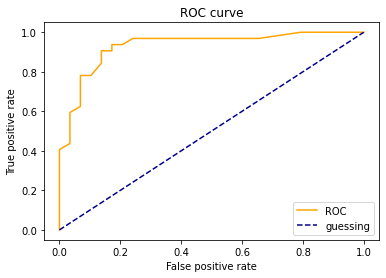

In [10]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    """
    Plot a ROC curve that gives the fpr and tpr of a model.
    """
    # Plot ROC
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="guessing")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [11]:
from sklearn.metrics import roc_auc_score

roc_auc_score (y_test, y_probs_positve)

0.9304956896551724

In [12]:
thresholds

array([2.  , 1.  , 0.98, 0.86, 0.84, 0.82, 0.76, 0.74, 0.7 , 0.66, 0.64,
       0.6 , 0.56, 0.52, 0.5 , 0.34, 0.3 , 0.26, 0.18, 0.12, 0.1 , 0.06,
       0.04, 0.02, 0.  ])